In [ ]:
pip install wooldridge

     |████████████████████████████████| 5.1 MB 5.0 MB/s 


In [ ]:
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
from scipy.stats import probplot
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp

In [ ]:
import wooldridge

In [ ]:
data = wooldridge.data('mlb1')

In [ ]:
data = data[['nl', 'salary', 'years', 'hits', 'rbis', 'bavg']]
data.head(3)

,nl,salary,years,hits,rbis,bavg
0,1,6329213.0,12,1939,836,289.0
1,1,3375000.0,8,863,342,259.0
2,1,3100000.0,5,840,355,299.0


In [ ]:
data.isnull().sum()

nl        0
salary    0
years     0
hits      0
rbis      0
bavg      0
dtype: int64

In [ ]:
# quartiles and counts
data.describe()

,nl,salary,years,hits,rbis,bavg
count,353.000000,3.530000e+02,353.000000,353.000000,353.000000,353.000000
mean,0.475921,1.345672e+06,6.325779,584.736544,264.745042,258.985836
std,0.500129,1.407352e+06,3.880142,575.378562,282.988672,38.422403
min,0.000000,1.090000e+05,1.000000,1.000000,1.000000,111.000000
25%,0.000000,2.536000e+05,3.000000,164.000000,60.000000,245.000000
50%,0.000000,6.750000e+05,6.000000,419.000000,173.000000,259.000000
75%,1.000000,2.250000e+06,9.000000,818.000000,361.000000,275.000000
max,1.000000,6.329213e+06,20.000000,3025.000000,1710.000000,625.000000


In [ ]:
data['nl'].value_counts()

0    185
1    168
Name: nl, dtype: int64

In [ ]:
data.groupby('nl').mean()['salary']

nl
0    1.411509e+06
1    1.273173e+06
Name: salary, dtype: float64

# Measures of center

Measures of center are how we define the middle, or center, of a dataset.

Mean - $\frac{\Sigma x_i}{n}$
* $x_i$ - individual data points
* $n$ - number of data points

In [ ]:
data['salary'].mean()

1345672.2492917846

In [ ]:
data['salary'].median()

675000.0

# Measures of variance

Measures of variance are how we define how spread out the data points are. 

Standard deviation = $\sqrt{\frac{\Sigma (x - \overline x)^2}{n}}$
* $s$ - standard deviation
* $x$ - individual data point
* $\overline x$ - mean of the data
* $n$ - number of data points

Sample standard deviation = $\sqrt{\frac{\Sigma (x - \overline x)^2}{n-1}}$
* degrees of freedom: n-1

In [ ]:
data['salary'].std()

1407351.8271815148

Sample skewness = $\sqrt{n}{\frac{\Sigma (x_i - \overline x)^3}{(\Sigma (x_i - \overline x)^2)^{3/2} }}$

The sample skewness of a data set is a numeric measure of skew.

sample excess kurtosis = $n {\frac{\Sigma (x_i - \overline x)^4}{(\Sigma (x_i - \overline x)^2)^{2} }-3}$

The sample excess kurtosis is a measure of the tails in a data set. Longer tails will lead to larger values.The following formula subtracts 3 so that “normal” data will have kurtosis that is roughly 0.

In [ ]:
stats.skew(data['salary'])

1.2413808909230981

In [ ]:
stats.kurtosis(data['salary'])

0.6670476989018179

The z-score is a way of telling us how far away a single data value is from the mean.

$z = \frac{x - \overline x}{s}$

* $s$ - standard deviation
* $x$ - individual data point
* $\overline x$ - mean of the data

<BarContainer object of 353 artists>

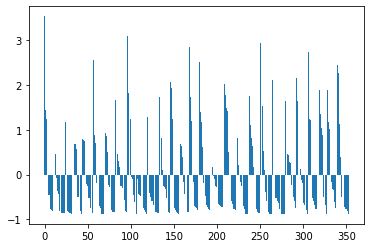

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(data))
z_scores = []

m = data['salary'].mean()
s = data['salary'].std()

for i in data['salary']:
    z = (i - m)/s  # z-score
    z_scores.append(z)  # make a list of the scores for plotting

plt.bar(y_pos, z_scores)

# Empirical rule

The Empirical rule states for data that is distributed normally:

* about 68% of the data fall within 1 standard deviation
* about 95% of the data fall within 2 standard deviations
* about 99.7% of the data fall within 3 standard deviations

In [ ]:
sd = 2 # number of standard deviations
z_list = []
for i in z_scores:
   if i < sd:
      z_list.append(i)
print(len(z_list)/len(z_scores)*100)

94.61756373937678


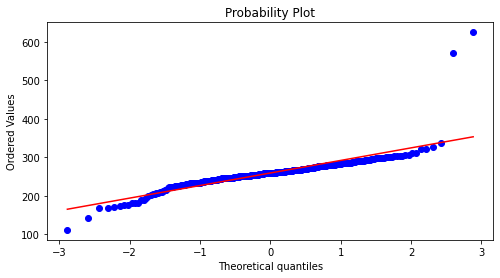

In [ ]:
# quantile-quantile plot of data
# visualize points that lie outside the normal-distribution
figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(data['bavg'], dist='norm', plot=ax)
plt.show()

# Correlation

Correlation coefficients are a quantitative measure that describe the strength of association/relationship between two variables.

cov(x, y)$ = \frac{1}{n-1} \Sigma (x_i-\overline{x})(y_i-\overline{y})$

cor(x,y)$ = \frac{1}{n-1} \Sigma (\frac{x_i-\overline{x}}{s_x})(\frac{y_i-\overline{y})}{s_y})$

In [ ]:
data.corr()

,nl,salary,years,hits,rbis,bavg
nl,1.000000,-0.049160,-0.119650,-0.112177,-0.128128,-0.031582
salary,-0.049160,1.000000,0.478152,0.627098,0.649485,0.281900
years,-0.119650,0.478152,1.000000,0.882413,0.822251,0.197296
hits,-0.112177,0.627098,0.882413,1.000000,0.942423,0.320975
rbis,-0.128128,0.649485,0.822251,0.942423,1.000000,0.278701
bavg,-0.031582,0.281900,0.197296,0.320975,0.278701,1.000000


# Point estimates

A point estimate is an estimate of a population parameter based on sample data.

# Central limit theorem

Central limit theorem states that the sampling distribution (the distribution of point estimates) will approach a normal distribution as we increase the number of samples taken.

# Statistical inference

populations - Our populations are modeled by distributions describing the randomness of each sampled data point. 

parameters - A parameter is a number that describe the population, such as the mean (µ) or the standard deviation (s). Parameters are typically denoted by Greek letters and typically are related to the description of the population as a family of related functions. 

samples - A sample is a collection of observations from the population, where an observation is a realization of a random variable with the population’s distribution. For our purposes, a sample is usually assumed to be a random sample from the population (implying independence). A sample has a certain size, n. 

statistics - A numeric summary of a sample. For example, the sample mean $\overline x$ or the sample standard deviation s.


# Confidence interval

A confidence interval is a range of values based on a point estimate that contains the true population parameter at some confidence level.

Higher confidence levels result in wider (larger) confidence intervals in order to be more sure.

Calculating a confidence interval involves finding a point estimate, and then, incorporating a margin of error to create a range. The margin of error is a value that represents our certainty that our point estimate is accurate and is based on our desired confidence level, the variance of the data, and sample size.

* Confidence interval for proportions: $\hat p \pm z* \sqrt{\frac{p(1-p)}{n}}$

* Confidence interval for samples: T = $\frac{\overline x - \mu}{s/\sqrt n}$

In [ ]:

# confidence interval for NL RBI's

sample_data = data[data['nl'] == 1]
sample_mean = sample_data['rbis'].mean()
sample_stdev = sample_data['rbis'].std()
sample_size = len(sample_data)
sigma = sample_stdev/math.sqrt(sample_size)
stats.t.interval(alpha = 0.95,              # Confidence level 95%
                 df= sample_size - 1,       # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation

(190.3034419727165, 263.19655802728346)

# Hypothesis test

A hypothesis test is a statistical test that is used to ascertain whether we are allowed to assume that a certain condition is true for the entire population, given a data sample.

The null hypothesis is the statement being tested and is the default correct answer; it is our starting point and our original hypothesis. The alternative hypothesis is the statement that opposes the null hypothesis. Our test will tell us which hypothesis we should trust and which we should reject.

Hypothesis testing steps:

1. Specify the hypotheses:
Formulate the two hypotheses: the null and the alternative. 
We usually use the notation of $H_0$ to represent the null hypothesis and $H_a$ to represent our alternative hypothesis.

2. Determine the sample size for the test sample:
This calculation depends on the chosen test. Usually, we have to determine a proper sample size in order to utilize theorems, such as the central limit theorem, and assume the normality of data.

3. Choose a significance level (usually called alpha or α):
A significance level of 0.05 is common.

4. Collect the data:
Collect a sample of data to conduct the test.

5. Decide whether to reject or fail to reject the null hypothesis:
This step changes slightly based on the type of test being used. The final result will either yield in rejecting the null hypothesis in favor of the alternative or failing to reject the null hypothesis.

# One sample t-tests

The one sample t-test is a statistical test used to determine whether a quantitative (numerical) data sample differs significantly from another dataset (the population or another sample).

* The population distribution should be normal, or the sample should be large (n ≥ 30).

* In order to make the assumption that the sample is independently randomly sampled, it is sufficient to enforce that the population size should be at least 10 times larger than the sample size (10n < N).

If we wish to answer the question, is the sample mean different from the population average, then this is called a two-tailed test.

$P(t^* \ne T) = 1-a/2$

If we want to answer either is the sample mean lower than the population average or is the sample mean higher than the population average, then we are dealing with a one-tailed test.

$P(t^* \le T) = 1-a$ or $P(T \le t^*) = 1-a$

The test statistic is used to compare the observed data with what is expected under the null hypothesis. The test statistic is used in conjunction with the p-value.

The p-value is the probability that the observed data occurred this way by chance.

When the data is showing very strong evidence against the null hypothesis, the test statistic becomes large (either positive or negative) and the p-value usually becomes very small, which means that our test is showing powerful results and what is happening is probably not happening by chance.

* If the p-value is less than the significance level, then we can reject the null hypothesis
* If the p-value is greater than the significance level, then we failed to reject the null hypothesis

## ANOVA test: two-sample t-tests

ANOVA tests performs hypothesis testing on two-sample means.   

In [ ]:
# Hypothesis test: 
# test mean differences between AL and NL player RBI's
NL_rbi = data[data['nl'] == 1]['rbis']
AL_rbi = data[data['nl'] == 0]['rbis']

sp.stats.ttest_ind(NL_rbi, AL_rbi)
# small p-valeue shows that mean NL and AL RBI's are different

Ttest_indResult(statistic=-2.420419608665931, pvalue=0.016009607305114176)

In [ ]:
NL_rbi.mean()

226.75

In [ ]:
AL_rbi.mean()

299.24864864864867

# Type I and II errors

A type I error occurs if we reject the null hypothesis when it is actually true. This is also known as a false positive. The type I error rate is equal to the significance level α, which means that if we set a higher confidence level, for example, a significance level of 99%, our α is .01, and therefore our false positive rate is 1%.

A type II error occurs if we fail to reject the null hypothesis when it is actually false. This is also known as a false negative. The higher we set our confidence level, the more likely we are to actually see a type II error.

# Hypothesis test for categorical variables - chi-square tests

The chi-square goodness of fit test is very similar to the one sample t-test in that it tests whether the distribution of the sample data matches an expected distribution, while the big difference is that it is testing for categorical variables.

There are two usual assumptions of this test, as follows:
* All the expected counts are at least 5
* Individual observations are independent and the population should be at least 10 times as large as the sample, (10n < N)

## Chi-square independence test

* $H_0$ : There is no association between two categorical variables in the population of interest
* $H_0$ : Two categorical variables are independent in the population of interest
* $H_a$ : There is an association between two categorical variables in the population of interest
* $H_a$ : Two categorical variables are not independent in the population of interest

* Test statistic: $\chi^2 = \Sigma \frac{(Observed_{r,c} - Expected_{r,c})^2}{Expected_{r,c}}$

# A/B testing example

Signed up
* Website A: 54
* Website B: 48

Did not sign up     
* Website A: 134
* Website B: 110

In [ ]:
observed = np.array([[134, 54],[110, 48]])

chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed= observed)

chi_squared, p_value

# p-value is far too high to conclude a sign-up rate difference between website A and B

(0.04762692369491045, 0.8272452870442226)